In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data Assignment - Ali.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       61 non-null     object 
 1   Date                      61 non-null     object 
 2   Leads                     41 non-null     float64
 3   Time spent on LG (mins)   41 non-null     float64
 4   Avg Time Per Lead (mins)  41 non-null     float64
 5   Daily Team Review         42 non-null     object 
 6   No. of Incomplete Leads   42 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


In [57]:
print(df.isnull().sum())

Day                          0
Date                         0
Leads                       20
Time spent on LG (mins)     20
Avg Time Per Lead (mins)    20
Daily Team Review           19
No. of Incomplete Leads     19
dtype: int64


In [58]:
df.describe()

,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),No. of Incomplete Leads
count,41.000000,41.000000,41.000000,42.000000
mean,11.902439,225.243902,19.439024,0.071429
std,3.039777,66.426192,5.949995,0.462910
min,5.000000,120.000000,12.000000,0.000000
25%,10.000000,170.000000,16.000000,0.000000
50%,11.000000,240.000000,17.000000,0.000000
75%,15.000000,260.000000,20.000000,0.000000
max,20.000000,360.000000,40.000000,3.000000



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


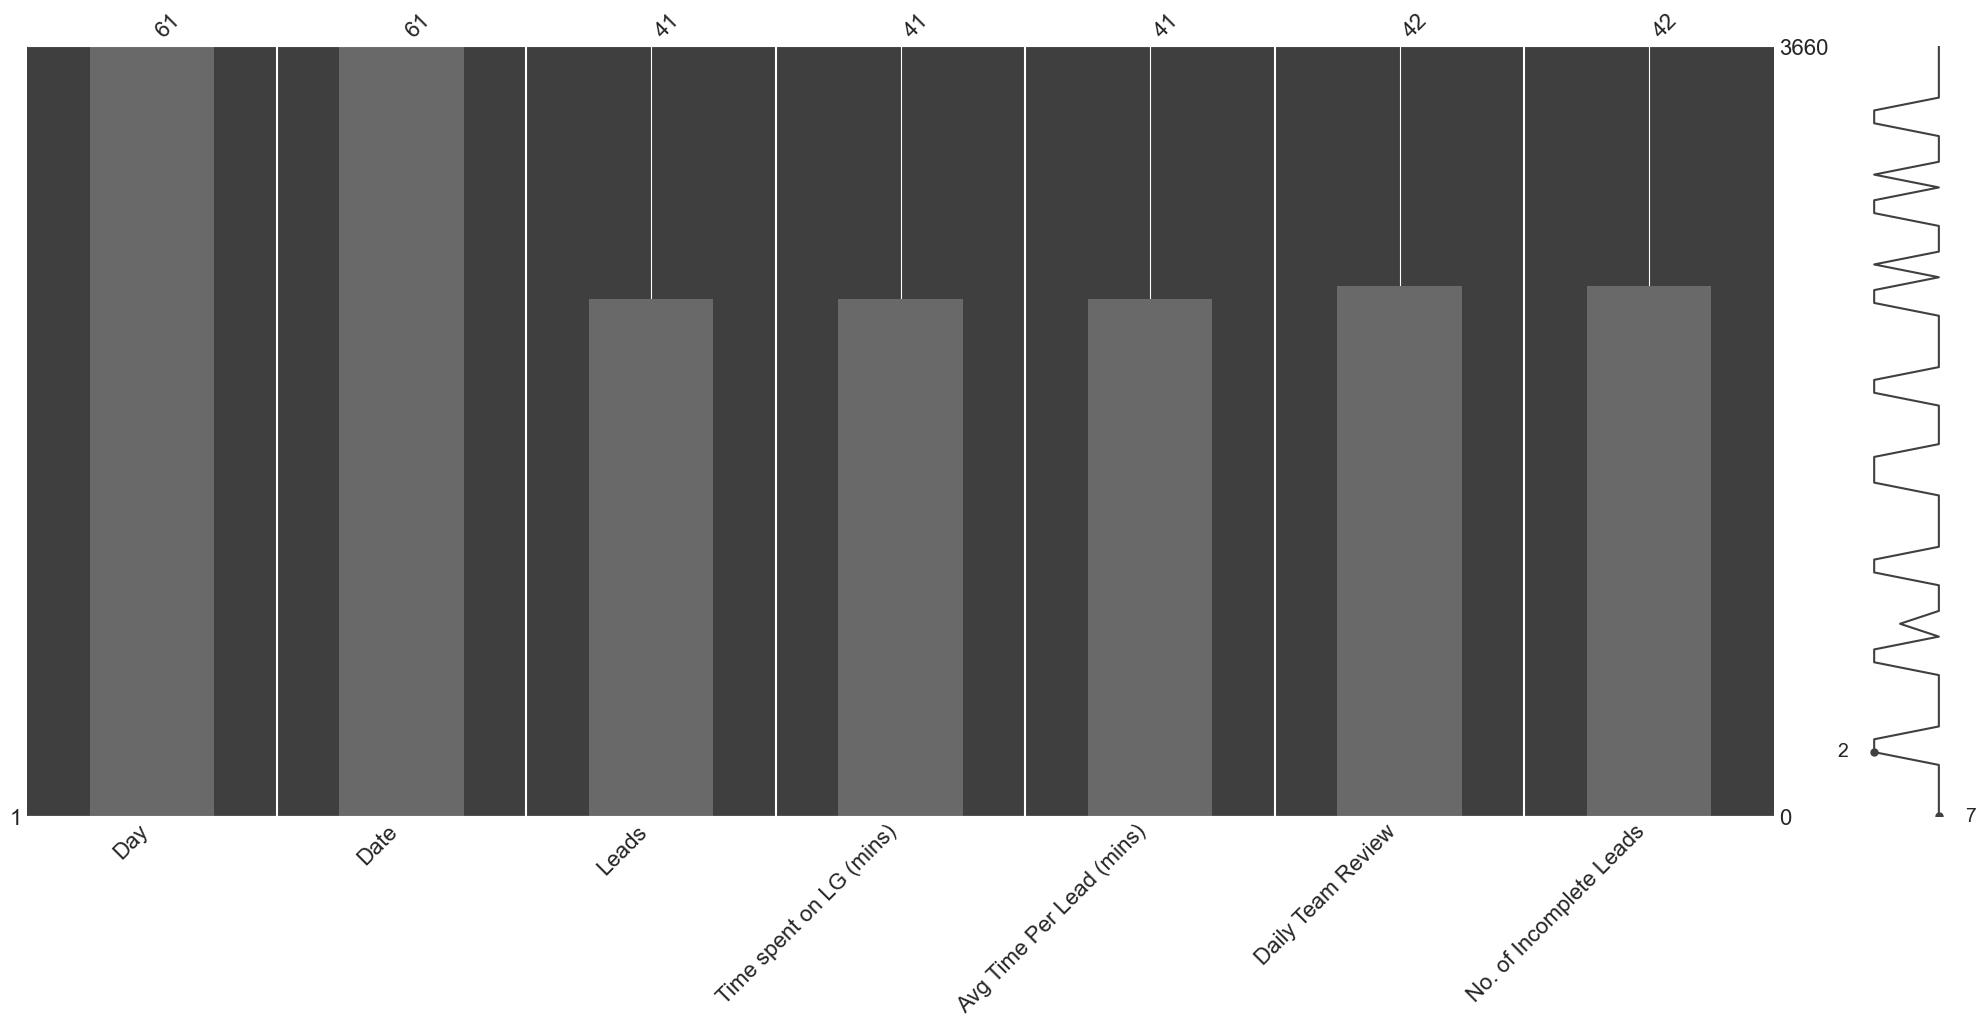

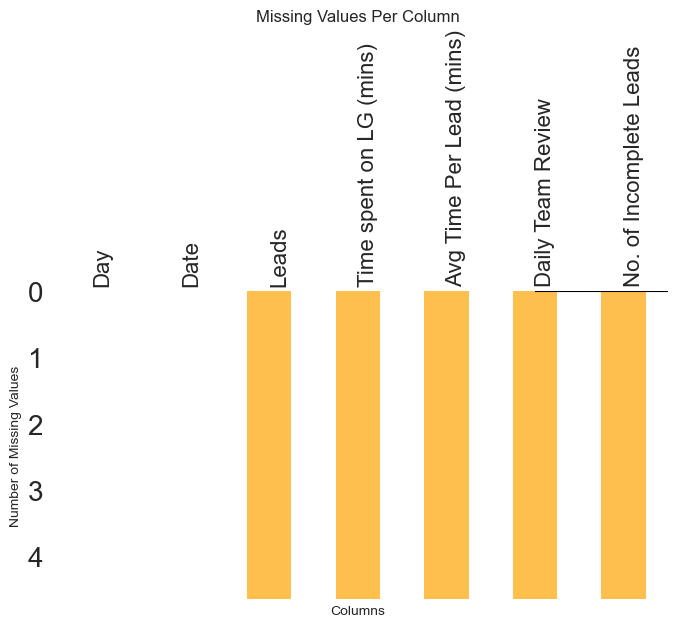

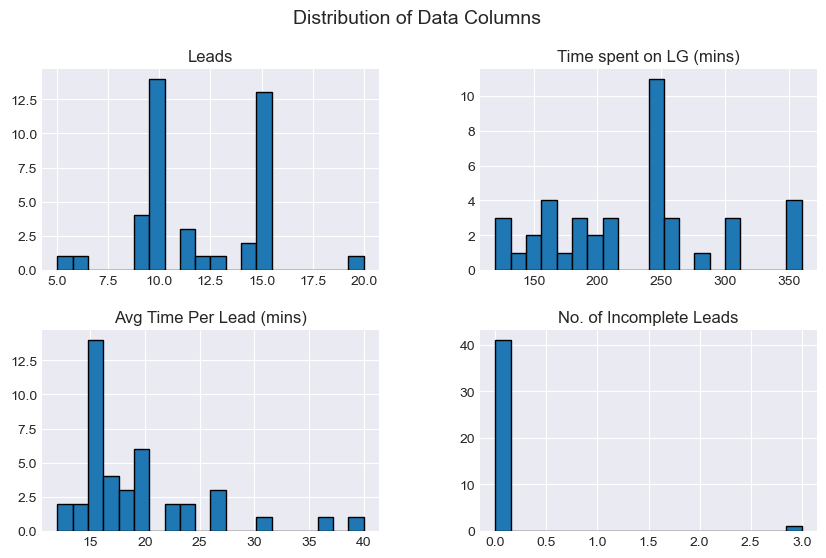

In [59]:
!pip install missingno
import missingno as msno

# Matrix visualization
msno.matrix(df)

# Bar chart showing the count of non-null values per column
msno.bar(df)

# Dendrogram to check missing value correlations
msno.dendrogram(df)
df.isnull().sum().plot(kind='bar', figsize=(8, 4), color='orange', alpha=0.7)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Column")
plt.show()
df.hist(figsize=(10,6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Data Columns", fontsize=14)
plt.show()

   Day        Date  Leads  Time spent on LG (mins)  Avg Time Per Lead (mins)  \
0  Mon  12/06/2023    5.0                    135.0                      27.0   
1  Tue  13/06/2023    9.0                    210.0                      23.0   
2  Wed  14/06/2023   13.0                    300.0                      23.0   
3  Thu  15/06/2023    9.0                    360.0                      40.0   
4  Fri  16/06/2023   11.0                    300.0                      27.0   
5  Sat  17/06/2023    NaN                      NaN                       NaN   
6  Sun  18/06/2023    NaN                      NaN                       NaN   
7  Mon  19/06/2023   10.0                    360.0                      36.0   
8  Tue  20/06/2023   14.0                    360.0                      26.0   
9  Wed  21/06/2023    9.0                    280.0                      31.0   

   Daily Team Review  No. of Incomplete Leads  
0                1.0                      0.0  
1                1.0   

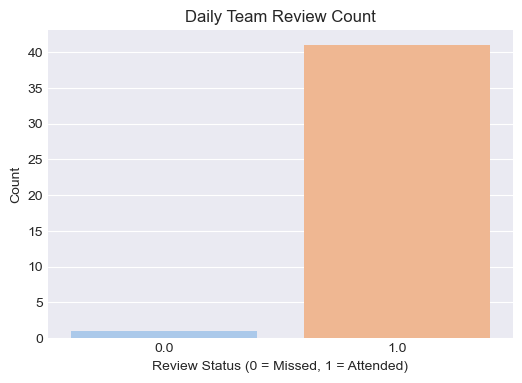

In [60]:
import pandas as pd
# Convert 'Daily Team Review' to numerical values
df['Daily Team Review'] = df['Daily Team Review'].map({'Attended': 1, 'Missed': 0})
# Display the updated DataFrame
print(df.head(10))  # Show first 5 rows
review_counts = df['Daily Team Review'].value_counts()
print("Daily Team Review Count:\n", review_counts)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Daily Team Review'], palette="pastel")
plt.title("Daily Team Review Count")
plt.xlabel("Review Status (0 = Missed, 1 = Attended)")
plt.ylabel("Count")
plt.show()

In [61]:
from scipy.stats import skew
def check_skewness(df):
    num_cols = df.select_dtypes(include=['number']).columns  
    if num_cols.empty:
        print("No numerical columns found!")
        return
    df_filled = df[num_cols].apply(lambda x: x.fillna(x.median()) if x.isnull().sum() > 0 else x)
    skewness_values = df_filled.skew()
    decision = {}
    print("Column-wise Skewness and Decision:\n")
    for col in num_cols:
        skew_val = skewness_values[col]
        if -0.5 <= skew_val <= 0.5:
            decision[col] = "Use Mean ✅ (Data is Normally Distributed)"
        else:
            decision[col] = "Use Median ⚠️ (Data is Skewed)"
        print(f"{col}: Skewness = {skew_val:.2f} → {decision[col]}")
check_skewness(df)

Column-wise Skewness and Decision:

Leads: Skewness = 0.57 → Use Median ⚠️ (Data is Skewed)
Time spent on LG (mins): Skewness = 0.26 → Use Mean ✅ (Data is Normally Distributed)
Avg Time Per Lead (mins): Skewness = 2.47 → Use Median ⚠️ (Data is Skewed)
Daily Team Review: Skewness = -7.81 → Use Median ⚠️ (Data is Skewed)
No. of Incomplete Leads: Skewness = 7.81 → Use Median ⚠️ (Data is Skewed)


In [62]:
# Fill missing values based on skewness decision
df["Leads"].fillna(df["Leads"].median(), inplace=True)
df["Time spent on LG (mins)"].fillna(df["Time spent on LG (mins)"].mean(), inplace=True)
df["Avg Time Per Lead (mins)"].fillna(df["Avg Time Per Lead (mins)"].median(), inplace=True)
df["Daily Team Review"].fillna(df["Daily Team Review"].median(), inplace=True)
df["No. of Incomplete Leads"].fillna(df["No. of Incomplete Leads"].median(), inplace=True)

df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,5.0,135.0,27.0,1.0,0.0
1,Tue,13/06/2023,9.0,210.0,23.0,1.0,3.0
2,Wed,14/06/2023,13.0,300.0,23.0,1.0,0.0
3,Thu,15/06/2023,9.0,360.0,40.0,1.0,0.0
4,Fri,16/06/2023,11.0,300.0,27.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,16.0,1.0,0.0
57,Tue,08/08/2023,15.0,300.0,20.0,1.0,0.0
58,Wed,09/08/2023,15.0,240.0,16.0,1.0,0.0
59,Thu,10/08/2023,15.0,240.0,16.0,1.0,0.0


In [63]:
df.head(20)

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,5.0,135.000000,27.0,1.0,0.0
1,Tue,13/06/2023,9.0,210.000000,23.0,1.0,3.0
2,Wed,14/06/2023,13.0,300.000000,23.0,1.0,0.0
3,Thu,15/06/2023,9.0,360.000000,40.0,1.0,0.0
4,Fri,16/06/2023,11.0,300.000000,27.0,1.0,0.0
5,Sat,17/06/2023,11.0,225.243902,17.0,1.0,0.0
6,Sun,18/06/2023,11.0,225.243902,17.0,1.0,0.0
7,Mon,19/06/2023,10.0,360.000000,36.0,1.0,0.0
8,Tue,20/06/2023,14.0,360.000000,26.0,1.0,0.0
9,Wed,21/06/2023,9.0,280.000000,31.0,1.0,0.0


In [64]:
from scipy.stats import skew
def check_skewness(df):
    num_cols = df.select_dtypes(include=['number']).columns  
    if num_cols.empty:
        print("No numerical columns found!")
        return
    df_filled = df[num_cols].apply(lambda x: x.fillna(x.median()) if x.isnull().sum() > 0 else x)
    skewness_values = df_filled.skew()
    decision = {}
    print("Column-wise Skewness and Decision:\n")
    for col in num_cols:
        skew_val = skewness_values[col]
        if -0.5 <= skew_val <= 0.5:
            decision[col] = "Use Mean ✅ (Data is Normally Distributed)"
        else:
            decision[col] = "Use Median ⚠️ (Data is Skewed)"
        print(f"{col}: Skewness = {skew_val:.2f} → {decision[col]}")
check_skewness(df)

Column-wise Skewness and Decision:

Leads: Skewness = 0.57 → Use Median ⚠️ (Data is Skewed)
Time spent on LG (mins): Skewness = 0.54 → Use Median ⚠️ (Data is Skewed)
Avg Time Per Lead (mins): Skewness = 2.47 → Use Median ⚠️ (Data is Skewed)
Daily Team Review: Skewness = -7.81 → Use Median ⚠️ (Data is Skewed)
No. of Incomplete Leads: Skewness = 7.81 → Use Median ⚠️ (Data is Skewed)


In [65]:
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,5.0,135.0,27.0,1.0,0.0
1,Tue,13/06/2023,9.0,210.0,23.0,1.0,3.0
2,Wed,14/06/2023,13.0,300.0,23.0,1.0,0.0
3,Thu,15/06/2023,9.0,360.0,40.0,1.0,0.0
4,Fri,16/06/2023,11.0,300.0,27.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,16.0,1.0,0.0
57,Tue,08/08/2023,15.0,300.0,20.0,1.0,0.0
58,Wed,09/08/2023,15.0,240.0,16.0,1.0,0.0
59,Thu,10/08/2023,15.0,240.0,16.0,1.0,0.0


In [66]:
df["Leads"].fillna(df["Leads"].median(), inplace=True)
df["Time spent on LG (mins)"].fillna(df["Time spent on LG (mins)"].median(), inplace=True)
df["Avg Time Per Lead (mins)"].fillna(df["Avg Time Per Lead (mins)"].median(), inplace=True)
df["Daily Team Review"].fillna(df["Daily Team Review"].median(), inplace=True)
df["No. of Incomplete Leads"].fillna(df["No. of Incomplete Leads"].median(), inplace=True)
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,5.0,135.0,27.0,1.0,0.0
1,Tue,13/06/2023,9.0,210.0,23.0,1.0,3.0
2,Wed,14/06/2023,13.0,300.0,23.0,1.0,0.0
3,Thu,15/06/2023,9.0,360.0,40.0,1.0,0.0
4,Fri,16/06/2023,11.0,300.0,27.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,16.0,1.0,0.0
57,Tue,08/08/2023,15.0,300.0,20.0,1.0,0.0
58,Wed,09/08/2023,15.0,240.0,16.0,1.0,0.0
59,Thu,10/08/2023,15.0,240.0,16.0,1.0,0.0


In [67]:
from scipy.stats import skew
skewness_values = df[["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)", 
                      "Daily Team Review", "No. of Incomplete Leads"]].apply(skew)
print("Updated Skewness Values:\n", skewness_values)

Updated Skewness Values:
 Leads                       0.558529
Time spent on LG (mins)     0.530169
Avg Time Per Lead (mins)    2.409704
Daily Team Review          -7.616867
No. of Incomplete Leads     7.616867
dtype: float64


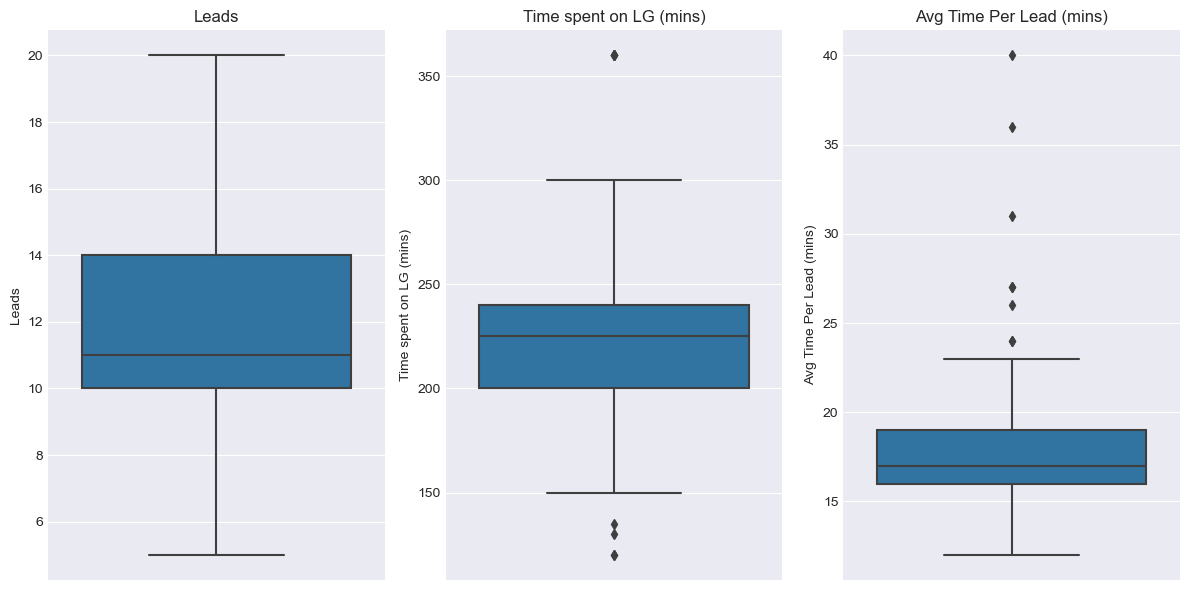

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with high outlier percentages
high_outlier_cols = ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]

# Boxplots for visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(high_outlier_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [69]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Function to check outlier percentage
def check_outliers(df, num_cols):
    print("Outlier Analysis for Numerical Columns:\n")
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Decision criteria
        if outlier_percentage < 5:
            decision = "Keep outliers (low impact)."
        elif outlier_percentage <= 10:
            decision = "Consider removing (moderate impact)."
        else:
            decision = "Likely data issue, further analysis needed."
        
        print(f"{col}: {outlier_percentage:.2f}% outliers → {decision}")

# Call the function
check_outliers(df, num_cols)


Outlier Analysis for Numerical Columns:

Leads: 0.00% outliers → Keep outliers (low impact).
Time spent on LG (mins): 13.11% outliers → Likely data issue, further analysis needed.
Avg Time Per Lead (mins): 13.11% outliers → Likely data issue, further analysis needed.
Daily Team Review: 1.64% outliers → Keep outliers (low impact).
No. of Incomplete Leads: 1.64% outliers → Keep outliers (low impact).


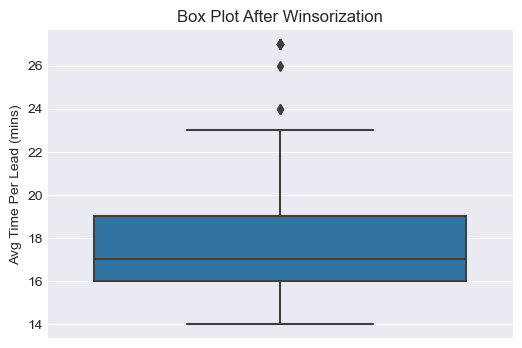

In [70]:
from scipy.stats.mstats import winsorize
df["Avg Time Per Lead (mins)"] = winsorize(df["Avg Time Per Lead (mins)"], limits=[0.05, 0.05])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Avg Time Per Lead (mins)"])
plt.title("Box Plot After Winsorization")
plt.show()

In [71]:
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,5.0,135.0,27.0,1.0,0.0
1,Tue,13/06/2023,9.0,210.0,23.0,1.0,3.0
2,Wed,14/06/2023,13.0,300.0,23.0,1.0,0.0
3,Thu,15/06/2023,9.0,360.0,27.0,1.0,0.0
4,Fri,16/06/2023,11.0,300.0,27.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,16.0,1.0,0.0
57,Tue,08/08/2023,15.0,300.0,20.0,1.0,0.0
58,Wed,09/08/2023,15.0,240.0,16.0,1.0,0.0
59,Thu,10/08/2023,15.0,240.0,16.0,1.0,0.0


In [73]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (5th and 95th percentile)
df["Avg Time Per Lead (mins) Winsorized"] = winsorize(df["Avg Time Per Lead (mins)"], limits=[0.05, 0.05])

# Verify the new column
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,5.0,135.0,27.0,1.0,0.0,27.0
1,Tue,13/06/2023,9.0,210.0,23.0,1.0,3.0,23.0
2,Wed,14/06/2023,13.0,300.0,23.0,1.0,0.0,23.0
3,Thu,15/06/2023,9.0,360.0,27.0,1.0,0.0,27.0
4,Fri,16/06/2023,11.0,300.0,27.0,1.0,0.0,27.0
...,...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,16.0,1.0,0.0,16.0
57,Tue,08/08/2023,15.0,300.0,20.0,1.0,0.0,20.0
58,Wed,09/08/2023,15.0,240.0,16.0,1.0,0.0,16.0
59,Thu,10/08/2023,15.0,240.0,16.0,1.0,0.0,16.0


In [75]:
df = df.drop(columns=["Avg Time Per Lead (mins)"])

In [76]:
df

,Day,Date,Leads,Time spent on LG (mins),Daily Team Review,No. of Incomplete Leads,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,5.0,135.0,1.0,0.0,27.0
1,Tue,13/06/2023,9.0,210.0,1.0,3.0,23.0
2,Wed,14/06/2023,13.0,300.0,1.0,0.0,23.0
3,Thu,15/06/2023,9.0,360.0,1.0,0.0,27.0
4,Fri,16/06/2023,11.0,300.0,1.0,0.0,27.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,15.0,240.0,1.0,0.0,16.0
57,Tue,08/08/2023,15.0,300.0,1.0,0.0,20.0
58,Wed,09/08/2023,15.0,240.0,1.0,0.0,16.0
59,Thu,10/08/2023,15.0,240.0,1.0,0.0,16.0


In [77]:
df.to_csv("FINAL ALI.csv", index=False)
df.head(10)

,Day,Date,Leads,Time spent on LG (mins),Daily Team Review,No. of Incomplete Leads,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,5.0,135.000000,1.0,0.0,27.0
1,Tue,13/06/2023,9.0,210.000000,1.0,3.0,23.0
2,Wed,14/06/2023,13.0,300.000000,1.0,0.0,23.0
3,Thu,15/06/2023,9.0,360.000000,1.0,0.0,27.0
4,Fri,16/06/2023,11.0,300.000000,1.0,0.0,27.0
5,Sat,17/06/2023,11.0,225.243902,1.0,0.0,17.0
6,Sun,18/06/2023,11.0,225.243902,1.0,0.0,17.0
7,Mon,19/06/2023,10.0,360.000000,1.0,0.0,27.0
8,Tue,20/06/2023,14.0,360.000000,1.0,0.0,26.0
9,Wed,21/06/2023,9.0,280.000000,1.0,0.0,27.0


In [79]:
# Round off to 2 decimal places
df["Time spent on LG (mins)"] = df["Time spent on LG (mins)"].round(2)
print(df["Time spent on LG (mins)"].head(10))

0    135.00
1    210.00
2    300.00
3    360.00
4    300.00
5    225.24
6    225.24
7    360.00
8    360.00
9    280.00
Name: Time spent on LG (mins), dtype: float64


In [80]:
df.to_csv("FINAL ALI.csv", index=False)
df.head(10)

,Day,Date,Leads,Time spent on LG (mins),Daily Team Review,No. of Incomplete Leads,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,5.0,135.00,1.0,0.0,27.0
1,Tue,13/06/2023,9.0,210.00,1.0,3.0,23.0
2,Wed,14/06/2023,13.0,300.00,1.0,0.0,23.0
3,Thu,15/06/2023,9.0,360.00,1.0,0.0,27.0
4,Fri,16/06/2023,11.0,300.00,1.0,0.0,27.0
5,Sat,17/06/2023,11.0,225.24,1.0,0.0,17.0
6,Sun,18/06/2023,11.0,225.24,1.0,0.0,17.0
7,Mon,19/06/2023,10.0,360.00,1.0,0.0,27.0
8,Tue,20/06/2023,14.0,360.00,1.0,0.0,26.0
9,Wed,21/06/2023,9.0,280.00,1.0,0.0,27.0
